# EICU data from the Dungog East Coast Low

This notebook imports and explores the cleaned up data from the EICU for the Dungug East Coast Low event. The data have been cleaned to remove empty fields, and an error in the lat/lon values for Medowie (where the lat and lon values were swapped). 

The working directory for this project is: 

\\nas\gemd\georisk\HaRIA_B_Wind\projects\impact_forecasting\data\exposure\NSW\April_2015_Impact_Assessment

*Date: August 2017, Creator: Claire Krause*

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import seaborn as sns
sns.set_context("poster")

# Start by reading in an exploring the dataset

In [2]:
filename = "//nas/gemd/georisk/HaRIA_B_Wind/projects/impact_forecasting/data/exposure/NSW/April_2015_Impact_Assessment/Property_Damage_cleaned.csv"
df = pd.read_csv(filename)
df

### List of column headings

In [3]:
df.columns

Index([u'OBJECTID', u'createdate', u'GlobalID', u'srcglobalid', u'papoid',
       u'srcid', u'assessoff', u'teamid', u'dateinsp', u'agency', u'eventname',
       u'eventtype', u'areainspd', u'position_', u'number_', u'street',
       u'streettype', u'suburb', u'state_', u'postcode', u'country',
       u'longaddrss', u'gurasaddrss', u'latitude', u'longitude', u'propinsurd',
       u'continsurd', u'buildnguse', u'foundation', u'structure_', u'roof',
       u'floorlngth', u'floorwidth', u'numfloors', u'numbsement', u'numaprt',
       u'numaprthab', u'asbestos', u'pwrwiredwn', u'dangertree', u'othdebris',
       u'Unnamed: 41', u'propstatus', u'degdamage', u'roofdam', u'frmecollap',
       u'bldleaning', u'rackingdam', u'grndmovemt', u'Unnamed: 49',
       u'waterinund', u'maxwatrlev', u'washoutreq', u'validaddress',
       u'EICU_Degdamage', u'EICU_Degdam_Source', u'Comments'],
      dtype='object')

### How many entries do we have for each column?
I.e. not NaN. Note that this does not check the contents of the field, only that something was written into it

In [4]:
df.count()

OBJECTID              2072
createdate            2072
GlobalID              2072
srcglobalid           2072
papoid                2072
srcid                 1821
assessoff             2054
teamid                1778
dateinsp              1821
agency                1778
eventname             2072
eventtype             2072
areainspd             1530
position_             1821
number_               1792
street                1821
streettype            2072
suburb                2071
state_                2072
postcode              2072
country               2072
longaddrss            1862
gurasaddrss           2004
latitude              2062
longitude             2062
propinsurd            1821
continsurd            1821
buildnguse            1909
foundation            1821
structure_            1821
roof                  1821
floorlngth            2072
floorwidth            2072
numfloors             2072
numbsement            2072
numaprt               2072
numaprthab            2072
a

# EICU data for the Hunter Region ECL event:

* Number of data entries = 2072
* Lat/lon = 2062 (99.5%)
* EICU_Degdamage - damage state rank = 2055 (99.2%)
* Insurance state = 1821 (88%)
* Building use = 1909 (92%)
* Foundations / Structure / Roof type = 1821 (88%)
* Water inundation = 1317 (64%)
* Water level = 203 (10%)

# Just do some quick cleaning up of the data

There are a number of blank fields throughout the data where a value was not entered into the dataset by the assessor. We need to keep track of the missing data, as well as the entered data, so we will find all 'NaN' values in the dataset, and change these to 'Not given' so we can include them in subsequent analyses. 

In [5]:
df = df.fillna('Not given')

# Lets explore some key fields in more detail...

In [6]:
damage = df.groupby('EICU_Degdamage').count()
damage.OBJECTID

EICU_Degdamage
Destroyed - 76-100%         14
Major Impact - 26-50%      147
Minor Impact - 1-25%       376
No Damage - 0%            1465
Not given                   17
Severe Impact - 51-75%      53
Name: OBJECTID, dtype: int64

## Damage and water?

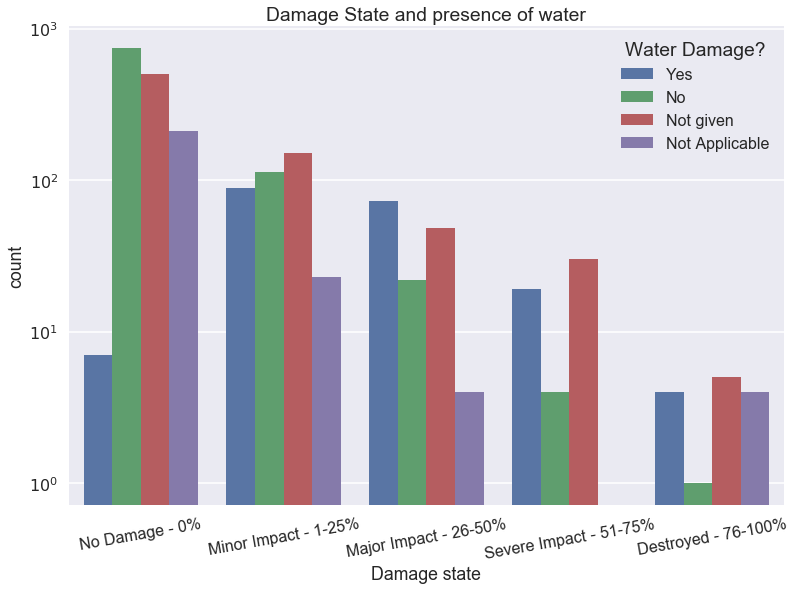

In [7]:
order = ['No Damage - 0%', 'Minor Impact - 1-25%', 'Major Impact - 26-50%', 'Severe Impact - 51-75%', 'Destroyed - 76-100%']
ax = sns.countplot(x="EICU_Degdamage", hue="waterinund", data=df, order=order)
ax.legend(title="Water Damage?", loc=1)
ax.set_yscale("log", nonposy='clip')
plt.xticks(rotation=10)
plt.title('Damage State and presence of water')
plt.xlabel('Damage state')

## Damage by roof type

In [8]:
temp = []
for name, group in df.groupby('EICU_Degdamage'):
    numingroup = group['OBJECTID'].count()
    numroofs = group.groupby('roof').count()
    percroofs = numroofs['OBJECTID']/numingroup*100
    for keys in percroofs.keys():
        temp.append((name, keys, percroofs[keys]))

roofdamage = pd.DataFrame(temp, columns = ['Damage_state', 'Roof_type', 'Percent'])
roofdamage

,Damage_state,Roof_type,Percent
0,Destroyed - 76-100%,Metal Sheeting,42.857143
1,Destroyed - 76-100%,Not Applicable,7.142857
2,Destroyed - 76-100%,Not given,21.428571
3,Destroyed - 76-100%,Tile,28.571429
4,Major Impact - 26-50%,Fibre Sheeting,0.680272
5,Major Impact - 26-50%,Metal Sheeting,38.095238
6,Major Impact - 26-50%,Not Applicable,2.721088
7,Major Impact - 26-50%,Not given,27.891156
8,Major Impact - 26-50%,Tile,30.612245
9,Minor Impact - 1-25%,Fibre Sheeting,0.797872


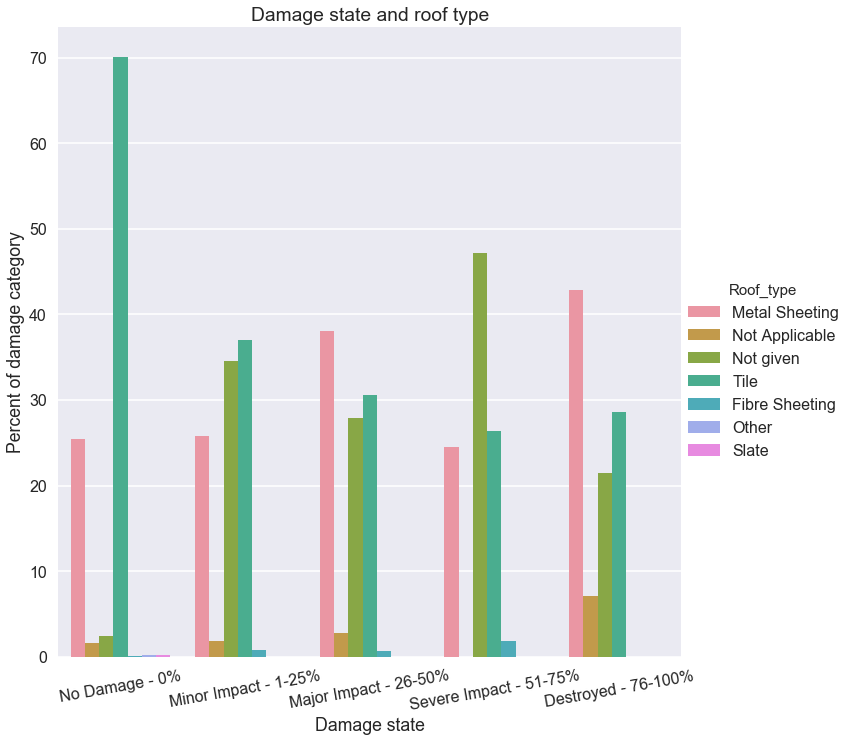

In [9]:
order = ['No Damage - 0%', 'Minor Impact - 1-25%', 'Major Impact - 26-50%', 'Severe Impact - 51-75%', 'Destroyed - 76-100%']
ax = sns.factorplot(x="Damage_state", y = 'Percent', hue="Roof_type", data=roofdamage, order=order, kind = 'bar', size = 10)
plt.xticks(rotation=10)
plt.title('Damage state and roof type')
plt.ylabel('Percent of damage category')
plt.xlabel('Damage state')

## Damage by wall structure type

In [10]:
temp = []
for name, group in df.groupby('EICU_Degdamage'):
    numingroup = group['OBJECTID'].count()
    numroofs = group.groupby('structure_').count()
    percroofs = numroofs['OBJECTID']/numingroup*100
    for keys in percroofs.keys():
        temp.append((name, keys, percroofs[keys]))

structuredamage = pd.DataFrame(temp, columns = ['Damage_state', 'Structure_type', 'Percent'])
structuredamage

,Damage_state,Structure_type,Percent
0,Destroyed - 76-100%,Brick Veneer,35.714286
1,Destroyed - 76-100%,Not applicable,14.285714
2,Destroyed - 76-100%,Not given,21.428571
3,Destroyed - 76-100%,Steel Frame,7.142857
4,Destroyed - 76-100%,Timber Frame,21.428571
5,Major Impact - 26-50%,Brick Veneer,27.210884
6,Major Impact - 26-50%,Not applicable,2.040816
7,Major Impact - 26-50%,Not given,27.891156
8,Major Impact - 26-50%,Other,3.401361
9,Major Impact - 26-50%,Steel Frame,0.680272


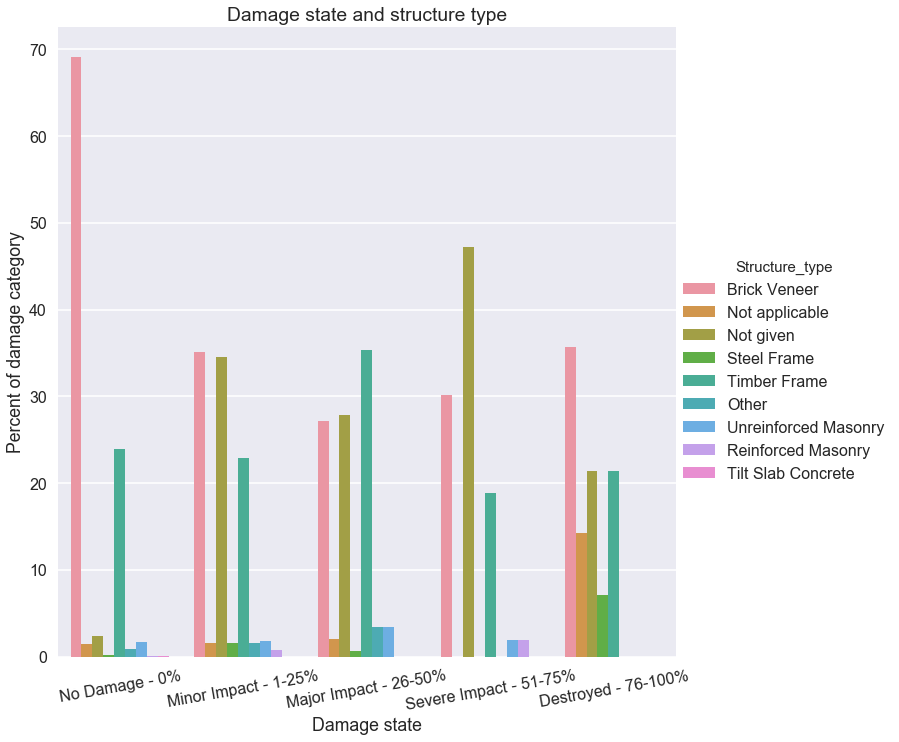

In [11]:
order = ['No Damage - 0%', 'Minor Impact - 1-25%', 'Major Impact - 26-50%', 'Severe Impact - 51-75%', 'Destroyed - 76-100%']
ax = sns.factorplot(x="Damage_state", y = 'Percent', hue="Structure_type", data=structuredamage, order=order, 
                    kind = 'bar', size = 10)
plt.xticks(rotation=10)
plt.title('Damage state and structure type')
plt.ylabel('Percent of damage category')
plt.xlabel('Damage state')

# Can we find wind damage specifically?

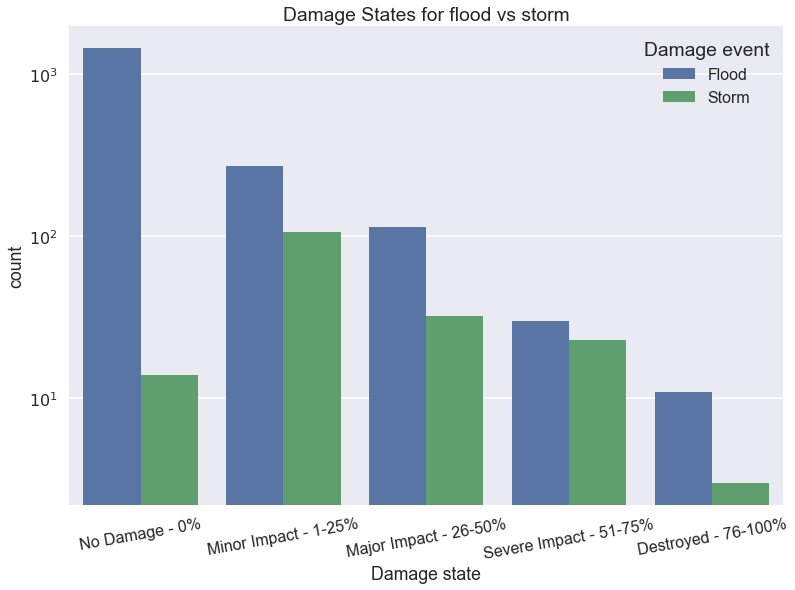

In [12]:
order = ['No Damage - 0%', 'Minor Impact - 1-25%', 'Major Impact - 26-50%', 'Severe Impact - 51-75%', 'Destroyed - 76-100%']
ax = sns.countplot(x="EICU_Degdamage", hue="eventtype", data=df, order=order)
ax.legend(title="Damage event", loc=1)
ax.set_yscale("log", nonposy='clip')
plt.xticks(rotation=10)
plt.title('Damage States for flood vs storm')
plt.xlabel('Damage state')

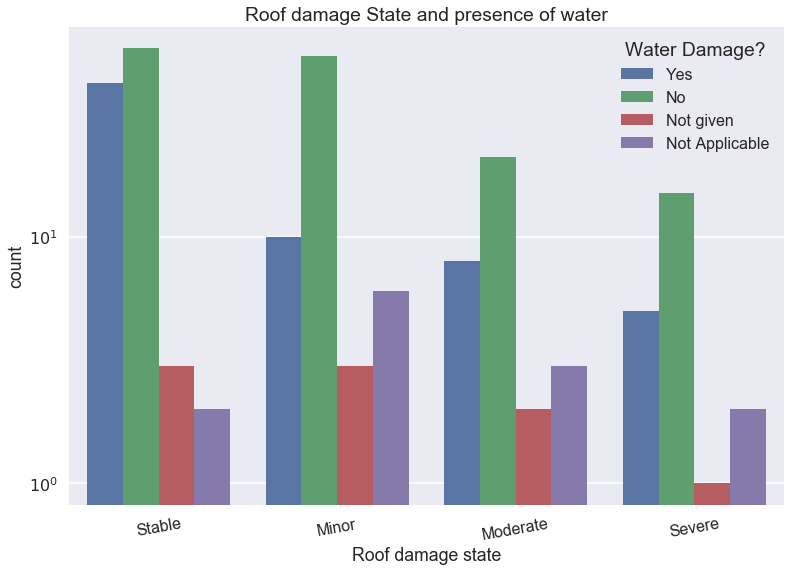

In [13]:
order = ['Stable', 'Minor', 'Moderate', 'Severe']
ax = sns.countplot(x="roofdam", hue="waterinund", data=df, order = order)
ax.legend(title="Water Damage?")
ax.set_yscale("log", nonposy='clip')
plt.xticks(rotation=10)
plt.title('Roof damage State and presence of water')
plt.xlabel('Roof damage state')

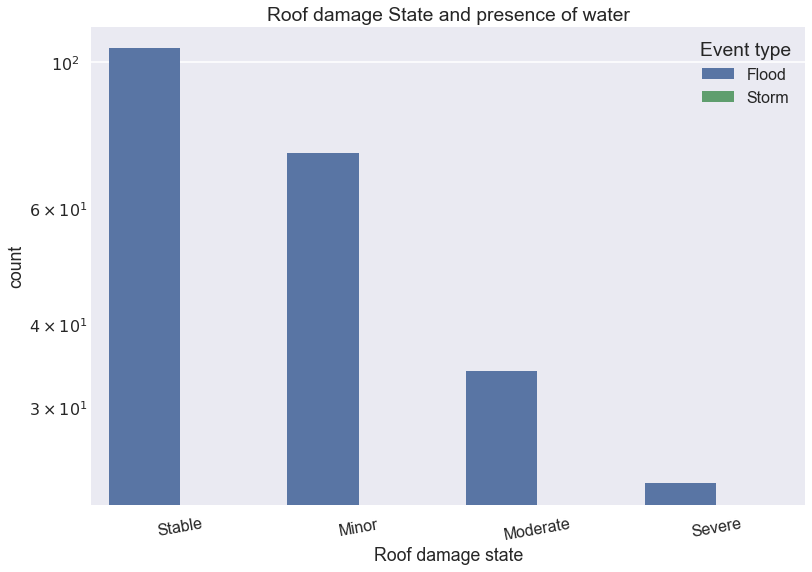

In [14]:
order = ['Stable', 'Minor', 'Moderate', 'Severe']
ax = sns.countplot(x="roofdam", hue="eventtype", data=df, order = order)
ax.legend(title="Event type")
ax.set_yscale("log", nonposy='clip')
plt.xticks(rotation=10)
plt.title('Roof damage State and presence of water')
plt.xlabel('Roof damage state')

## NB
Wind damage doesn't seem to be discernable from this dataset. Roof damage could be used a pseudo-proxy for storm damage, however it is not specifically marked as storm damage in the database. For all of the entries that have roof damage assessed, all of them list the envent type as 'flood', not 'storm'. This suggests that water ingress from damaged roofs is classed as flood damage, not storm damage for this event.

